In [1]:
import pandas as pd
import numpy as np
import os
import sys
import random
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from itertools import product

sys.path.extend([
                '../src',
                '../data',
                ])

from utils import run_nested_cv_3a

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("CPU")
    
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

#data
left = pd.read_csv('../data/left.csv')
right = pd.read_csv('../data/right.csv')
affected = pd.read_csv('../data/affected.csv')
unaffected = pd.read_csv('../data/unaffected.csv')

right['limb'] = 1
left['limb'] = 2
affected['limb'] = 3
unaffected['limb'] = 4

affected['subject'] = affected['subject'] + 10
unaffected['subject'] = unaffected['subject'] + 10

combined = pd.concat([unaffected, 
                      affected, 
                      right, 
                      left], ignore_index=True)

architecture = {
               'num_filters': [50, 25],
               'filter_sizes': [5, 5],
               'pool_sizes': [5, 5]
               }

CPU


2025-07-09 20:54:02.713287: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.213


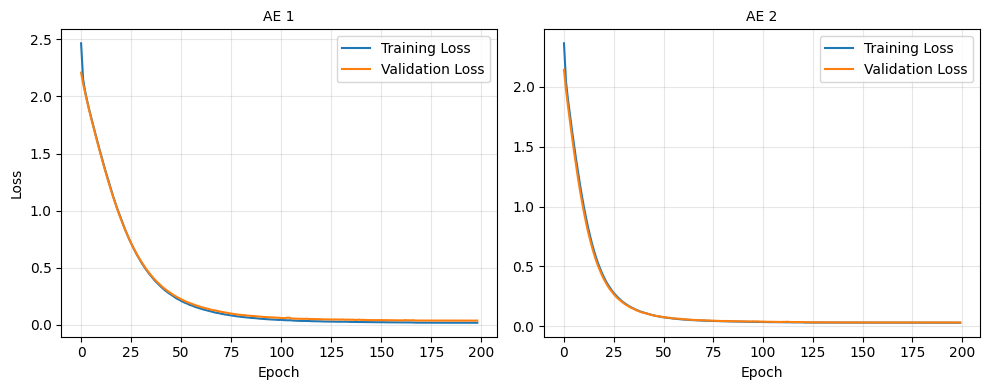

Limb: 1 Subject: 1 Youden Index: 0.22236394557823136 Sensitivity: 0.9931972789115646 Specificity: 0.22916666666666666
Limb: 2 Subject: 1 Youden Index: 0.12207463630613535 Sensitivity: 0.9607843137254902 Specificity: 0.16129032258064516
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.244


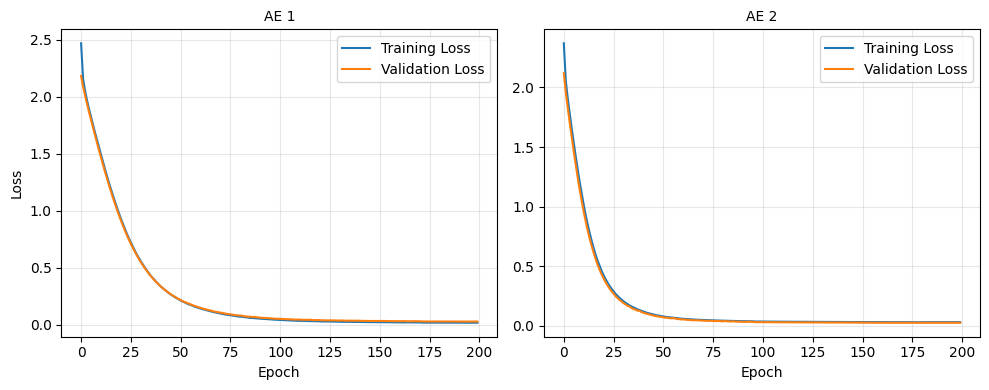

Limb: 1 Subject: 2 Youden Index: 0.2068965517241379 Sensitivity: 1.0 Specificity: 0.20689655172413793
Limb: 2 Subject: 2 Youden Index: 0.1794019933554818 Sensitivity: 0.9651162790697675 Specificity: 0.21428571428571427
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.212


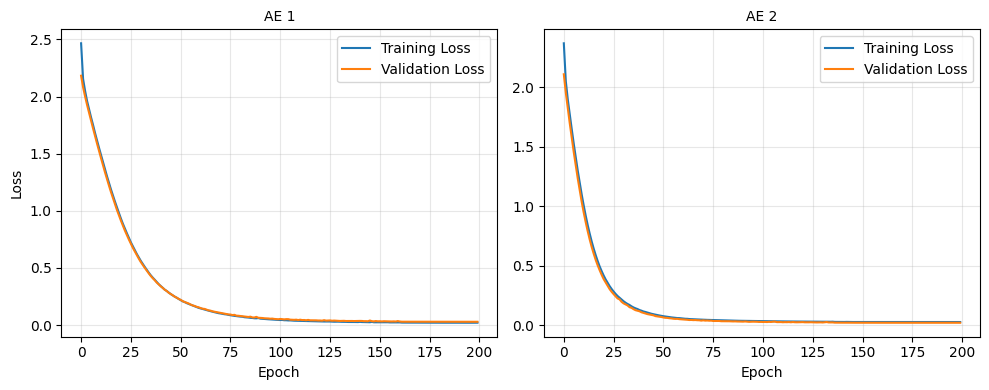

Limb: 1 Subject: 3 Youden Index: 0.31521739130434767 Sensitivity: 0.9891304347826086 Specificity: 0.32608695652173914
Limb: 2 Subject: 3 Youden Index: 0.18962008141112618 Sensitivity: 0.9850746268656716 Specificity: 0.20454545454545456
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.208


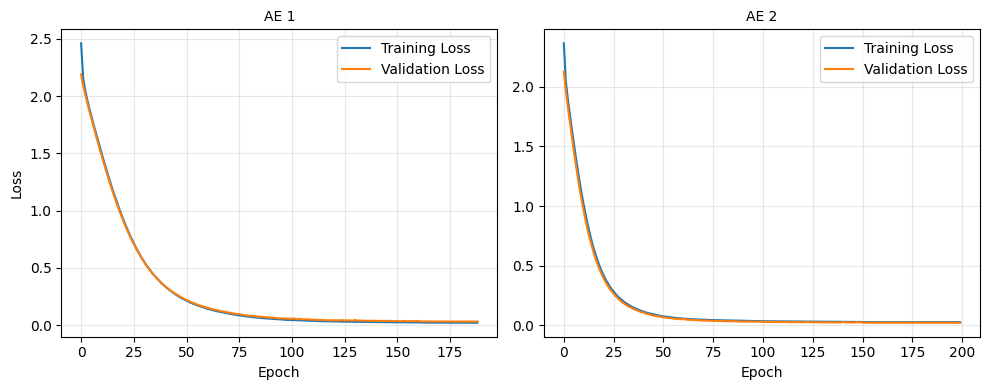

Limb: 1 Subject: 4 Youden Index: 0.35397590361445785 Sensitivity: 0.9939759036144579 Specificity: 0.36
Limb: 2 Subject: 4 Youden Index: 0.21075447334440156 Sensitivity: 0.9928057553956835 Specificity: 0.21794871794871795
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.226


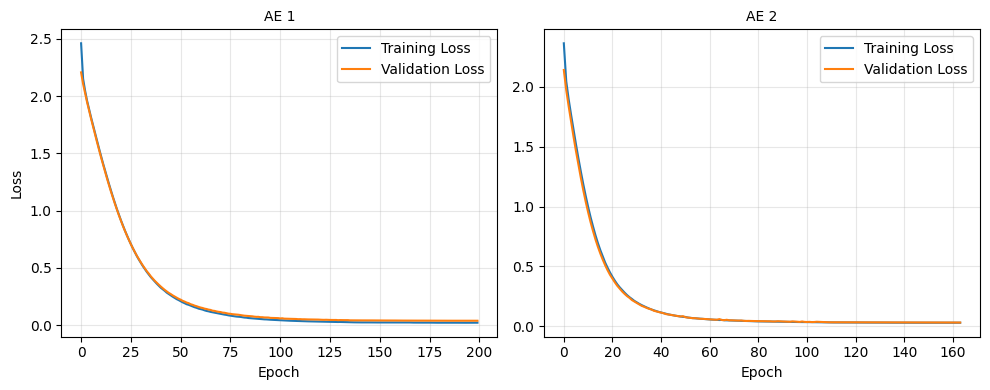

Limb: 1 Subject: 5 Youden Index: 0.3985119047619048 Sensitivity: 0.99375 Specificity: 0.40476190476190477
Limb: 2 Subject: 5 Youden Index: 0.30436991869918684 Sensitivity: 0.991869918699187 Specificity: 0.3125
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.250


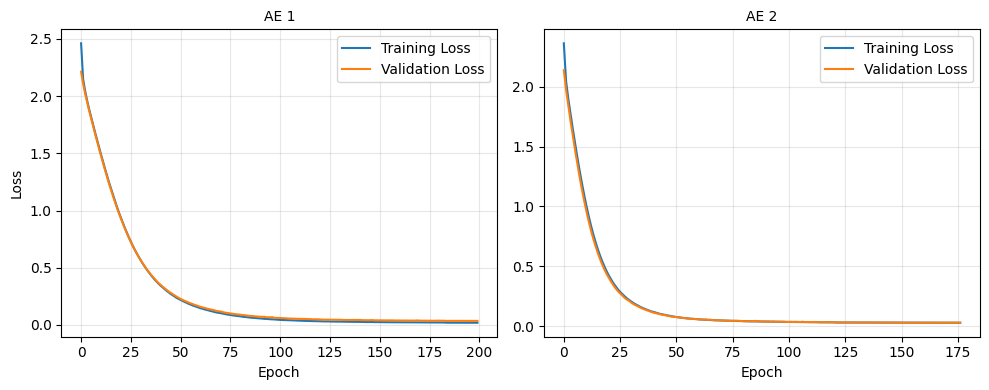

Limb: 1 Subject: 6 Youden Index: 0.40697674418604657 Sensitivity: 1.0 Specificity: 0.4069767441860465
Limb: 2 Subject: 6 Youden Index: 0.33488313646644885 Sensitivity: 0.9653179190751445 Specificity: 0.3695652173913043
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.207


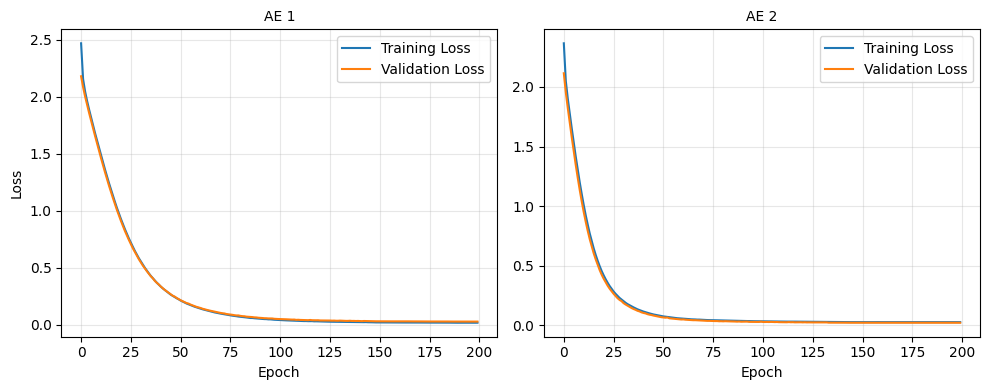

Limb: 1 Subject: 7 Youden Index: 0.14383412939643936 Sensitivity: 0.9948979591836735 Specificity: 0.14893617021276595
Limb: 2 Subject: 7 Youden Index: 0.1015325670498084 Sensitivity: 0.9793103448275862 Specificity: 0.12222222222222222
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.223


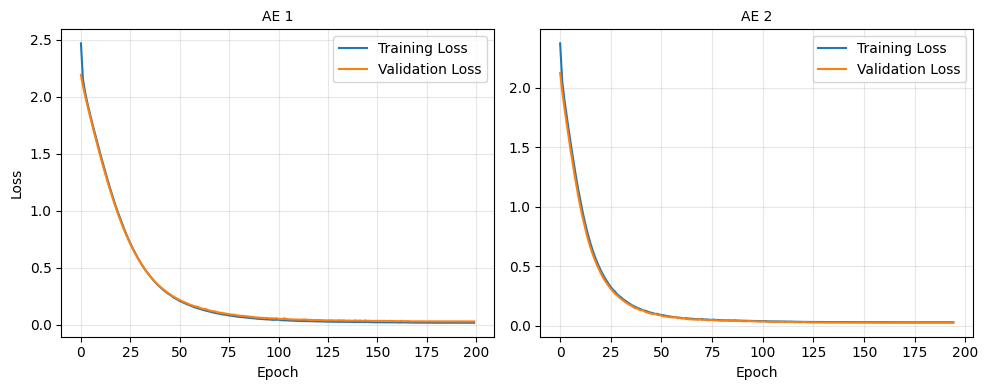

Limb: 1 Subject: 8 Youden Index: 0.22480562200956933 Sensitivity: 0.9904306220095693 Specificity: 0.234375
Limb: 2 Subject: 8 Youden Index: 0.16679748822605966 Sensitivity: 0.9744897959183674 Specificity: 0.19230769230769232
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.190


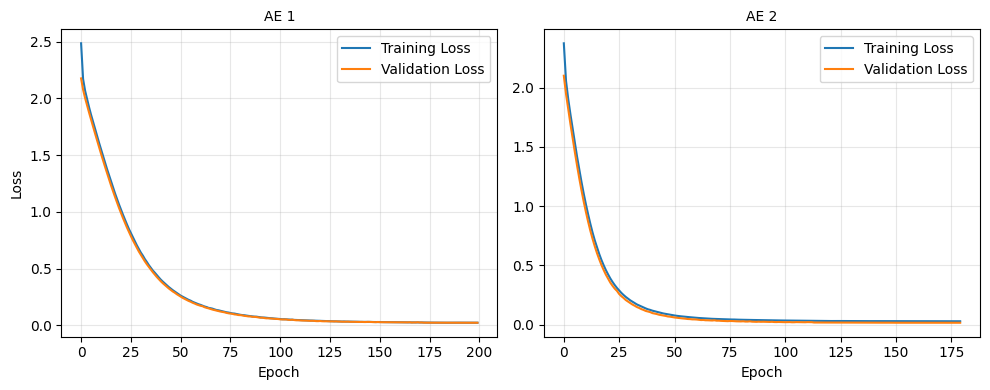

Limb: 1 Subject: 9 Youden Index: 0.13536364168275705 Sensitivity: 0.981042654028436 Specificity: 0.15432098765432098
Limb: 2 Subject: 9 Youden Index: 0.2720907066682292 Sensitivity: 0.9937888198757764 Specificity: 0.2783018867924528
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.225


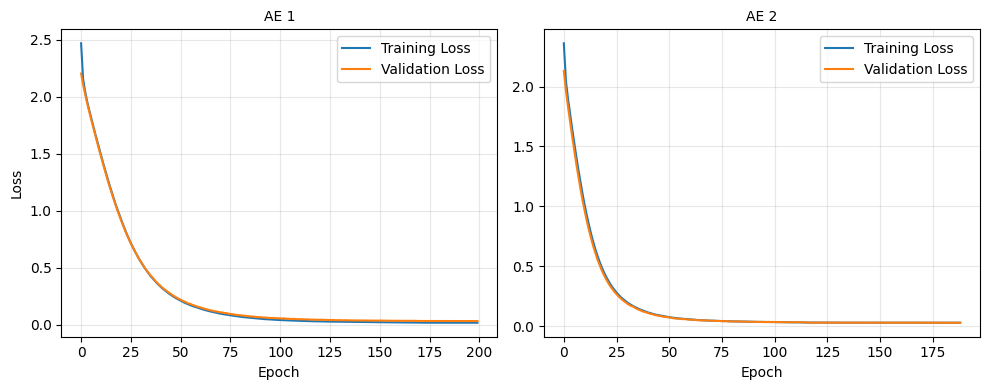

Limb: 1 Subject: 10 Youden Index: 0.31016092814371254 Sensitivity: 0.9820359281437125 Specificity: 0.328125
Limb: 2 Subject: 10 Youden Index: 0.1710615280594996 Sensitivity: 0.9411764705882353 Specificity: 0.22988505747126436
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.193


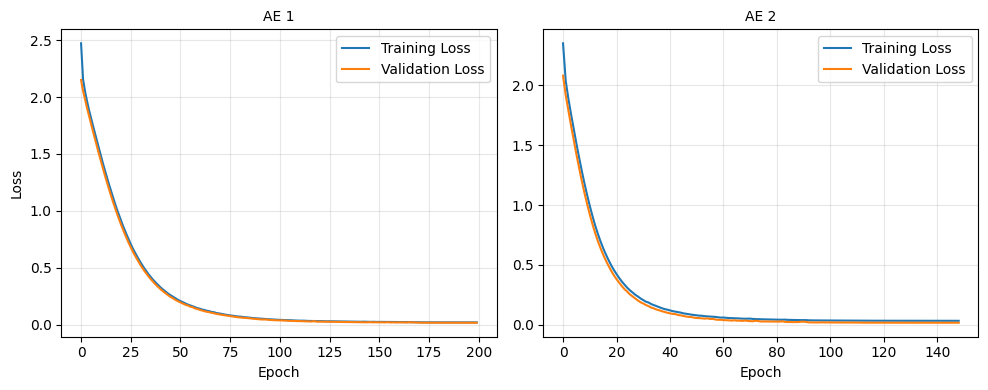

Limb: 3 Subject: 11 Youden Index: 0.13157894736842102 Sensitivity: 1.0 Specificity: 0.13157894736842105
Limb: 4 Subject: 11 Youden Index: 0.554112554112554 Sensitivity: 0.9404761904761905 Specificity: 0.6136363636363636
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.187


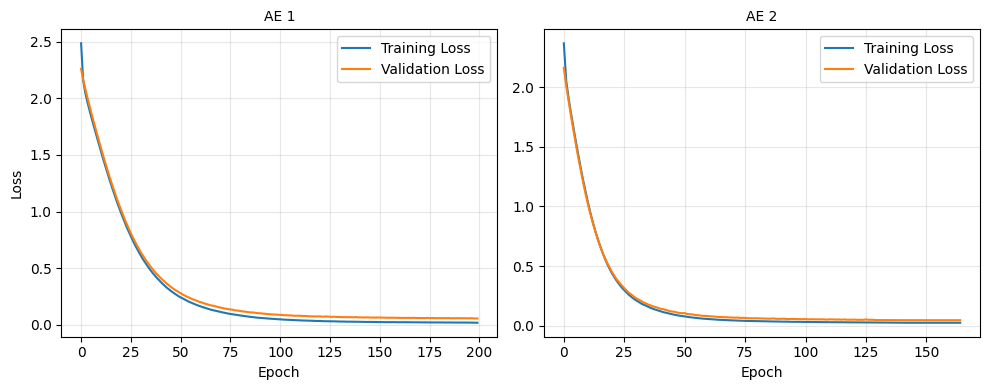

Limb: 3 Subject: 12 Youden Index: 0.15629267780229017 Sensitivity: 0.9940119760479041 Specificity: 0.16228070175438597
Limb: 4 Subject: 12 Youden Index: 0.4424481449021327 Sensitivity: 0.9662576687116564 Specificity: 0.47619047619047616
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.236


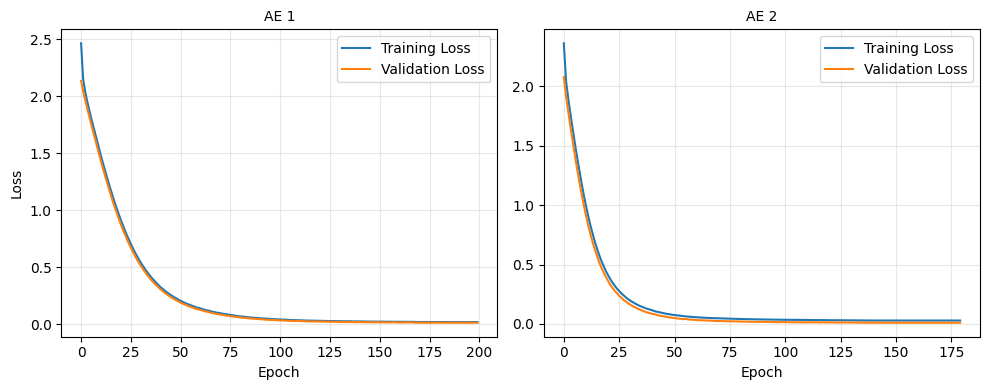

Limb: 3 Subject: 13 Youden Index: 0.016666666666666607 Sensitivity: 1.0 Specificity: 0.016666666666666666
Limb: 4 Subject: 13 Youden Index: -0.02238805970149249 Sensitivity: 0.9776119402985075 Specificity: 0.0
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.195


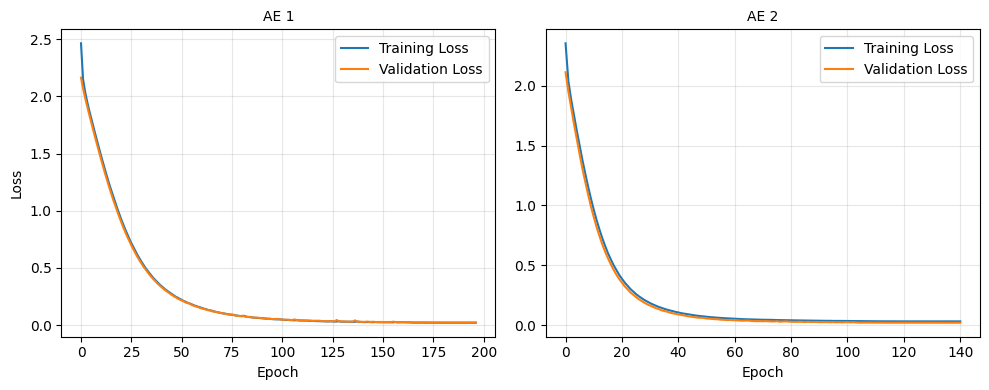

Limb: 3 Subject: 14 Youden Index: 0.3450854700854702 Sensitivity: 0.9861111111111112 Specificity: 0.358974358974359
Limb: 4 Subject: 14 Youden Index: 0.3705566733735748 Sensitivity: 0.9761904761904762 Specificity: 0.39436619718309857
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33ae8cca0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33ae8c6d0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x1650c8550>, 'optimizer': 'adam'} with score: 0.204


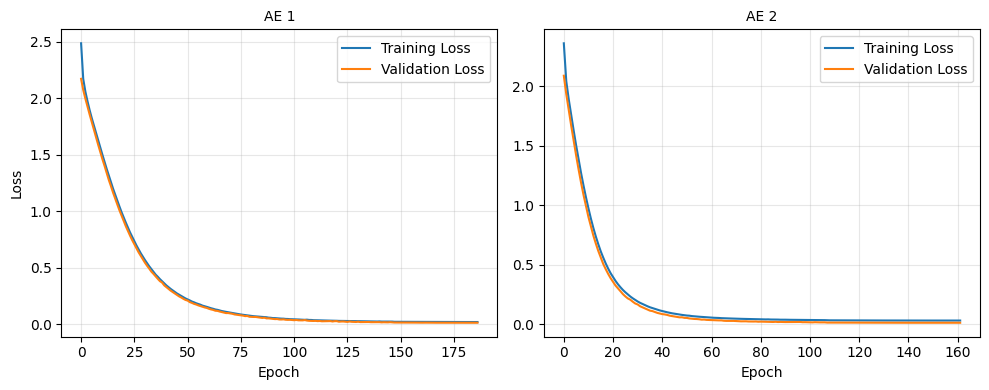

Limb: 3 Subject: 15 Youden Index: 0.3762376237623761 Sensitivity: 1.0 Specificity: 0.37623762376237624
Limb: 4 Subject: 15 Youden Index: 0.11843032267155129 Sensitivity: 0.9801324503311258 Specificity: 0.13829787234042554
0.2419904771010509 0.12926626784462886


In [2]:

approach = 3
filename = f'../results/approach3a/limb_nested_cv_generic.csv'

window_size = 100
epochs = 200
batch_size = 32
class_loss = False
plot_hist = False

error_func = 'mae'

X = combined[['ax', 'ay', 'az']]
y = combined['gnd']
subjects = combined['subject']
limbs = combined['limb']

hp = {
        'activation': ['tanh'],
        'kernel_init': [tf.keras.initializers.HeNormal(seed=42), ],
        'bias_init': [tf.keras.initializers.Zeros()],
        'optimizer':['adam'],
        'loss': [tf.keras.losses.mean_squared_error,],
        'learning_rate': [ 0.0001],
        'batch_norm': [True]
    }

results_3a = run_nested_cv_3a(window_size,             
                              X=X,                         
                              y=y,                        
                              subjects=subjects,           
                              limbs=limbs,                      
                              architecture=architecture,   
                              hp_grid=hp,
                              epochs=epochs,                  
                              batch_size=batch_size,              
                              class_loss=False,           
                              plot_hist=True,            
                              error_func='None')

print(np.mean(results_3a['youden_index']), np.std(results_3a['youden_index']))

In [3]:
print("\nResults Summary:")
print(results_3a.groupby(['limb']).agg({
    'youden_index': ['mean', 'std'],
    'sensitivity': ['mean', 'std'],
    'specificity': ['mean', 'std']
}).round(3))


Results Summary:
     youden_index        sensitivity        specificity       
             mean    std        mean    std        mean    std
limb                                                          
1           0.272  0.099       0.992  0.006       0.280  0.097
2           0.205  0.076       0.975  0.017       0.230  0.073
3           0.205  0.152       0.996  0.006       0.209  0.155
4           0.293  0.238       0.968  0.016       0.324  0.251
